# Graph fingerprinting

In [2]:
from graphfingerprint import *
measures_names = [
                'density',
                'frac_largest_connected_component',
                'connected_components_ent',
                'frac_center',
                'frac_periphery',
                'frac_barycenter',
                'srank_ratio',
                'erank_ratio',
                'transitivity',
                'avg_clustering',
                'avg_square_clustering',
                'modularity',
                'markov_rate',
                'basic_stats_med',
                'basic_stats_avg',
                'basic_stats_std',
                'basic_stats_md',
                'basic_stats_skew',
                'basic_stats_kurt',
                'eccentricity_med',
                'eccentricity_avg',
                'eccentricity_std',
                'eccentricity_md',
                'eccentricity_skew',
                'eccentricity_kurt',
                'degree_analysis_med',
                'degree_analysis_avg',
                'degree_analysis_std',
                'degree_analysis_md',
                'degree_analysis_skew',
                'degree_analysis_kurt',
                'flow_graph_med',
                'flow_graph_avg',
                'flow_graph_std',
                'flow_graph_md',
                'flow_graph_skew',
                'flow_graph_kurt',
                'communicability_med',
                'communicability_avg',
                'communicability_std',
                'communicability_md',
                'communicability_skew',
                'communicability_kurt',
                'similarity_analysis_med',
                'similarity_analysis_avg',
                'similarity_analysis_std',
                'similarity_analysis_md',
                'similarity_analysis_skew',
                'similarity_analysis_kurt']

nb_measures = len(measures_names)
nb_measures

49

## Basic example: random graph

In [13]:
N = 100
adj = np.random.rand(N,N)
adj = (adj>0.9).astype('double')
adj = normalize_adjacency(adj, method = 'max')

fp = fingerprint(adj)

print('Fingerprint as a dictionary:\n')
print(fp)
print('\nFingerprint as an array:\n')
print(dict_to_vec(fp))

Fingerprint as a dictionary:

{'density': 0.10404040404040404, 'frac_largest_connected_component': 1.0, 'connected_components_ent': 0, 'frac_center': 0.28, 'frac_periphery': 0.72, 'frac_barycenter': 0.01, 'srank_ratio': 0.07861336488165399, 'erank_ratio': 0.7748150789918593, 'transitivity': 0.10792563600782779, 'avg_clustering': 0.10570808480757803, 'avg_square_clustering': 0.11067543075673097, 'modularity': 0.1591525782866829, 'markov_rate': 0.6121607099889217, 'basic_stats': array([0.        , 0.103     , 0.30395888, 0.18480048, 0.79415883,
       0.53831413]), 'eccentricity': array([ 0.03030303,  0.02747475,  0.00453534,  0.00411387, -0.44897959,
       -0.00831054]), 'degree_analysis': array([0.2       , 0.206     , 0.04654031, 0.05342626, 0.07423058,
       0.07382623]), 'flow_graph': array([0.0027394 , 0.01      , 0.0381164 , 0.01420856, 0.75491731,
       0.59123   ]), 'communicability': array([0.00740301, 0.02698258, 0.10349283, 0.03806608, 0.75250207,
       0.5848554 ]), 'sim

## SVD analysis of 77 real networks extrated from the catalogue Netzschleuder.

In [14]:
# Loead all mupy arrays and perfom SVD
cwd = os.getcwd()
files = os.listdir(cwd + '/data/')
graph_names = []
results = dict()
for file in files:
    print(file)
    if file == '.DS_Store':
        continue
    name = os.path.splitext(file)[0]
    graph_names.append(name)
    adj = np.load('data/'+ file)
    Adj = np.array(adj>0).astype('float')
    G=nx.Graph(Adj)
    sv, index = normalized_svd(G)
    results[name] = [index, sv]

ambassador.npy
moreno_sociograms.npy
product_space.npy
lesmis.npy
facebook_organizations.npy
game_thrones.npy
polbooks.npy
dutch_criticism.npy
revolution.npy
.DS_Store
celegans_metabolic.npy


/Users/patrick/GitHub/NCADD-desrosiers/graphfingerprint.py:417: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


jazz_collab.npy
internet_top_pop.npy
messal_shale.npy
football.npy
ceo_club.npy
november17.npy
reality_mining.npy
faculty_hiring.npy
baseball.npy
new_guinea_tribes.npy
cs_department.npy
freshmen.npy
macaques.npy
edit_wiktionary.npy
karate.npy
email_company.npy
dom.npy
high_tech_company.npy
edit_wikibooks.npy
moreno_sheep.npy
fao_trade.npy
cattle.npy
celegans_2019.npy
celegansneural.npy
7th_graders.npy
interactome_pdz.npy
kegg_metabolic.npy
adjnoun.npy
moviegalaxies.npy
law_firm.npy
sa_companies.npy
montreal.npy
cintestinalis.npy
london_transport.npy
elite.npy
physics_collab.npy
college_freshmen.npy
dolphins.npy
packet_delays.npy
bison.npy
moreno_taro.npy
florentine_families.npy
fresh_webs.npy
blumenau_drug.npy
macaque_neural.npy
marvel_partnerships.npy
foodweb_little_rock.npy
plant_pol_kato.npy
eu_airlines.npy
human_brains.npy
malaria_genes.npy
openstreetmap.npy
hens.npy
ego_social.npy
foodweb_baywet.npy
kangaroo.npy
physician_trust.npy
dutch_school.npy
facebook_friends.npy
football_ts

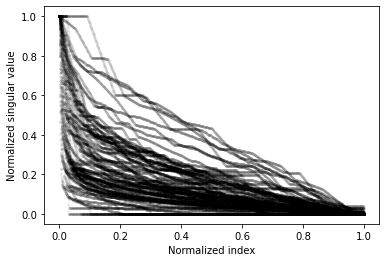

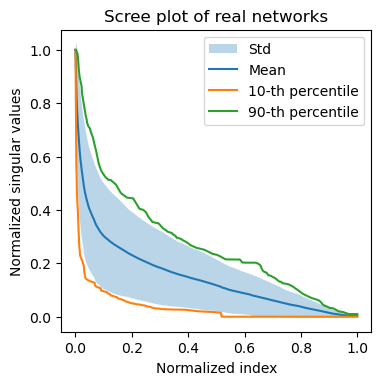

In [20]:
n=1000 # number of interpolation points
joint_x = np.array([i/n for i in range(n+1)])
Y = np.array([]).reshape((0,n+1))
for graph in results.keys():
    x,y = results[graph]
    joint_y = np.interp(joint_x, x,y)
    Y = np.vstack((Y,joint_y))
    plt.scatter(joint_x,joint_y, s=4, color = 'black',alpha = 0.05)
    
plt.xlabel('Normalized index')  
plt.ylabel('Normalized singular value') 
plt.show()

# Mean =- std plot with percentiles
y0 = np.mean(Y, axis =0)
y1 = y0-1.0*np.std(Y, axis =0)
y2 = y0+1.0*np.std(Y, axis =0)
zone = []
for j in range(len(joint_x)):
    vec = Y[:,j]
    count = 0
    for x in vec:
        if y1[j]<=x and x<=y2[j]:
            count+=1
    zone.append(count)

ten = np.percentile(Y, 10, axis=0)
ninety = np.percentile(Y, 90, axis=0)


plt.show()
plt.figure(figsize=(4,4), dpi=100)
plt.fill_between(joint_x, y1, y2, alpha = 0.3)
plt.plot(joint_x, y0)
plt.plot(joint_x, ten)
plt.plot(joint_x, ninety)
plt.xlabel('Normalized index')
plt.ylabel('Normalized singular value')
plt.title('Scree plot of real networks')
plt.legend(['Std', 'Mean', '10-th percentile', '90-th percentile'])
plt.show()

## Fingerprint analysis of 77 real networks extrated from the catalogue Netzschleuder.

In [21]:
# Load the data, perform the fingerprint analysis, and stack the results into a 77 (samples) x 49 (features) matrix
cwd = os.getcwd()
files = os.listdir(cwd + '/data/')
graph_measures = np.empty((0,nb_measures))
graph_names = []
for file in files:
    print(file)
    name = os.path.splitext(file)[0]
    if name != '.DS_Store':
        graph_names.append(name)
        adj = np.load('data/'+ file)
        Adj = np.array(adj>0).astype('float')
        #Adj = normalize_adjacency(Adj, method = 'max')
        results = dict_to_vec(fingerprint(Adj))
        graph_measures = np.vstack((graph_measures, np.real(results)))


ambassador.npy
moreno_sociograms.npy
product_space.npy
lesmis.npy
facebook_organizations.npy
game_thrones.npy
polbooks.npy
dutch_criticism.npy
revolution.npy
.DS_Store
celegans_metabolic.npy
jazz_collab.npy
internet_top_pop.npy
messal_shale.npy
football.npy
ceo_club.npy
november17.npy
reality_mining.npy
faculty_hiring.npy
baseball.npy
  Problem: average square clustering equal to 1.1993578254234232
new_guinea_tribes.npy
cs_department.npy
freshmen.npy
  Problem: average square clustering equal to 1.064516129032258
macaques.npy
edit_wiktionary.npy
karate.npy
email_company.npy
dom.npy
high_tech_company.npy
edit_wikibooks.npy
moreno_sheep.npy
fao_trade.npy
cattle.npy
celegans_2019.npy
celegansneural.npy
7th_graders.npy
interactome_pdz.npy
kegg_metabolic.npy
adjnoun.npy
moviegalaxies.npy
law_firm.npy
sa_companies.npy
montreal.npy
cintestinalis.npy
london_transport.npy
elite.npy
physics_collab.npy
college_freshmen.npy
dolphins.npy
packet_delays.npy
  Problem: average square clustering equal 

In [24]:
np.argwhere(np.isnan(graph_measures))

array([[21, 17],
       [21, 18],
       [21, 23],
       [21, 24],
       [21, 29],
       [21, 30],
       [48, 17],
       [48, 18],
       [48, 29],
       [48, 30],
       [62, 23],
       [62, 24],
       [62, 29],
       [62, 30]])

In [25]:
measures = np.nan_to_num(graph_measures)
measures

array([[ 0.15833333,  0.6875    ,  0.62733628, ...,  0.29055796,
         0.06155283, -0.07944192],
       [ 0.05630252,  1.        ,  0.        , ...,  0.18746743,
         0.45195386,  0.05704886],
       [ 0.0067602 ,  1.        ,  0.        , ...,  0.01657062,
         0.9558234 ,  0.8926562 ],
       ...,
       [ 0.00327228,  0.81196581,  0.32844303, ...,  0.08711344,
         0.88844654,  0.73821387],
       [ 0.05678993,  1.        ,  0.        , ...,  0.21302775,
         0.42259158,  0.12418361],
       [ 0.0757764 ,  1.        ,  0.        , ...,  0.15778798,
         0.46848025,  0.11310905]])

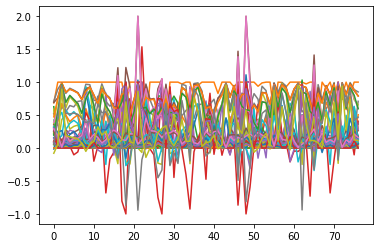

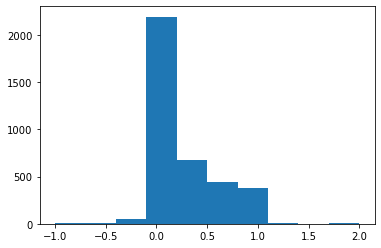

In [73]:
plt.plot(measures)
plt.show()

plt.hist(measures.flatten())
plt.show()

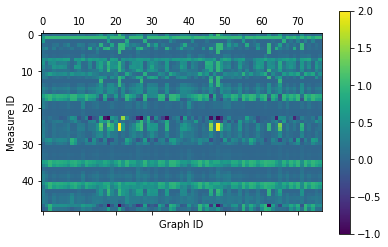

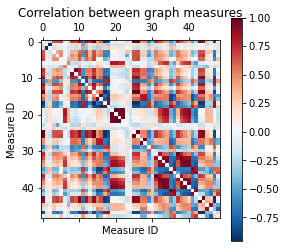

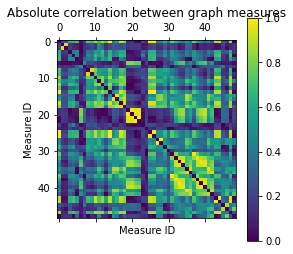

('density', 'basic_stats_avg', 0.9991601435762494)
('frac_largest_connected_component', 'connected_components_ent', 0.9559041790302456)
('connected_components_ent', 'frac_largest_connected_component', 0.9559041790302455)
('frac_center', 'markov_rate', 0.6653663700621941)
('frac_periphery', 'similarity_analysis_avg', 0.7117950784290511)
('frac_barycenter', 'density', 0.6837778553483486)
('srank_ratio', 'eccentricity_med', 0.8229268996337485)
('erank_ratio', 'srank_ratio', 0.5136715054884862)
('transitivity', 'avg_clustering', 0.9356450765860431)
('avg_clustering', 'transitivity', 0.935645076586043)
('avg_square_clustering', 'similarity_analysis_avg', 0.9183162690504731)
('modularity', 'similarity_analysis_skew', 0.8358024549956955)
('markov_rate', 'basic_stats_avg', 0.8384103400197859)
('basic_stats_med', 'basic_stats_avg', 0.7491618212640342)
('basic_stats_avg', 'degree_analysis_avg', 1.0)
('basic_stats_std', 'basic_stats_md', 0.9720085535612446)
('basic_stats_md', 'basic_stats_std', 0

In [75]:
# Heatmap representation of the fingerprint
plt.matshow(measures.T)
plt.ylabel('Measure ID')
plt.xlabel('Graph ID')
plt.colorbar()
plt.show()


corr = np.corrcoef(measures.T)

plt.matshow(corr-np.eye(nb_measures), cmap = 'RdBu_r')
plt.colorbar()
plt.xlabel('Measure ID')
plt.ylabel('Measure ID')
plt.title('Correlation between graph measures')
plt.show()

plt.matshow(np.absolute(corr)-np.eye(nb_measures))
plt.colorbar()
plt.xlabel('Measure ID')
plt.ylabel('Measure ID')
plt.title('Absolute correlation between graph measures')
plt.show()

corrcoeffs = np.absolute(corr)-np.eye(nb_measures)
for i in range(nb_measures):
    j = np.argmax(corrcoeffs[i,:])
    print((measures_names[i], measures_names[j], np.max(corrcoeffs[i,:])))
    

## Clustering of graphs

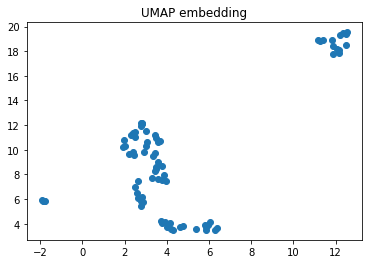

In [37]:
fit = umap.UMAP(n_neighbors=4, min_dist=0.1, n_components=2,)
u = fit.fit_transform(measures)
plt.scatter(u[:,0], u[:,1])
plt.title('UMAP embedding')
plt.show()

/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


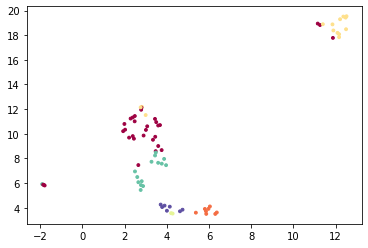

In [38]:
# Bad clustering
kmeans_labels = cluster.KMeans(n_clusters=6).fit_predict(measures)
plt.scatter(u[:, 0], u[:, 1], c=kmeans_labels, s=8.0, cmap='Spectral')
plt.show()

/Users/patrick/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


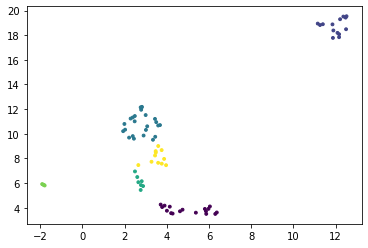

In [39]:
# Good clustering
kmeans_labels = cluster.KMeans(n_clusters=6).fit_predict(u)
plt.scatter(u[:, 0], u[:, 1], c=kmeans_labels, s=8.0, cmap='viridis')
plt.show()

In [40]:
cluster0 = np.where(kmeans_labels==0)[0]
for i in cluster0:
    print(graph_names[i])

reality_mining
baseball
new_guinea_tribes
freshmen
macaques
dom
high_tech_company
moreno_sheep
cattle
7th_graders
law_firm
college_freshmen
packet_delays
bison
hens
kangaroo
rhesus_monkey


In [41]:
cluster1 = np.where(kmeans_labels==1)[0]
for i in cluster1:
    print(graph_names[i])

product_space
revolution
edit_wiktionary
edit_wikibooks
interactome_pdz
kegg_metabolic
london_transport
marvel_partnerships
plant_pol_kato
openstreetmap
physician_trust
ecoli_transcription
copenhagen
kidnappings


In [42]:
cluster2 = np.where(kmeans_labels==2)[0]
for i in cluster1:
    print(graph_names[i])

product_space
revolution
edit_wiktionary
edit_wikibooks
interactome_pdz
kegg_metabolic
london_transport
marvel_partnerships
plant_pol_kato
openstreetmap
physician_trust
ecoli_transcription
copenhagen
kidnappings


In [43]:
cluster3 = np.where(kmeans_labels==3)[0]
for i in cluster1:
    print(graph_names[i])

product_space
revolution
edit_wiktionary
edit_wikibooks
interactome_pdz
kegg_metabolic
london_transport
marvel_partnerships
plant_pol_kato
openstreetmap
physician_trust
ecoli_transcription
copenhagen
kidnappings


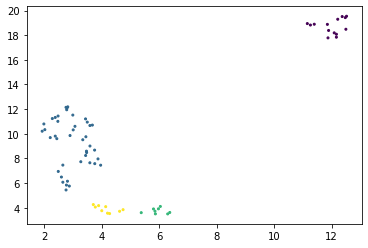

In [44]:
hdbscan_labels = hdbscan.HDBSCAN(min_samples=2, min_cluster_size=5).fit_predict(u)
clustered = (hdbscan_labels >= 0)
plt.scatter(u[clustered, 0],
            u[clustered, 1],
            c=hdbscan_labels[clustered],
            s=4.0,
            cmap='viridis')
plt.show()

In [76]:
### PCA analysis

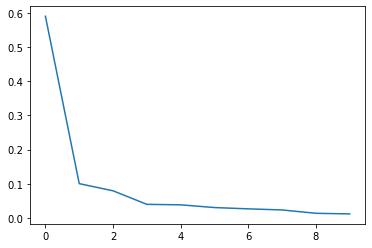

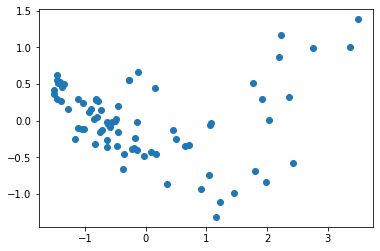

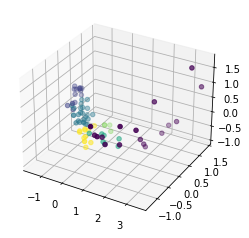

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(measures)

plt.plot(pca.explained_variance_ratio_)
plt.show()

X_pca = pca.transform(measures)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=kmeans_labels,s=20)
plt.show()

In [46]:
pca.explained_variance_ratio_

array([0.59071263, 0.10025983, 0.0792887 , 0.03961672, 0.03817648,
       0.03022246, 0.02638257, 0.02317211, 0.01338276, 0.01157159])

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.59071263, 0.69097246, 0.77026116, 0.80987788, 0.84805436,
       0.87827683, 0.9046594 , 0.92783151, 0.94121426, 0.95278585])

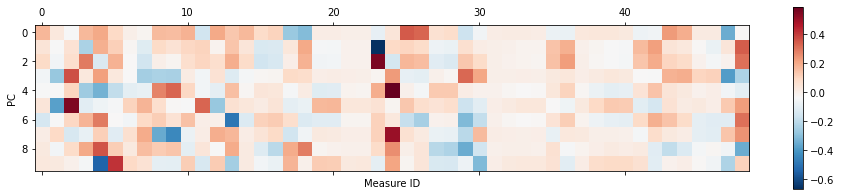

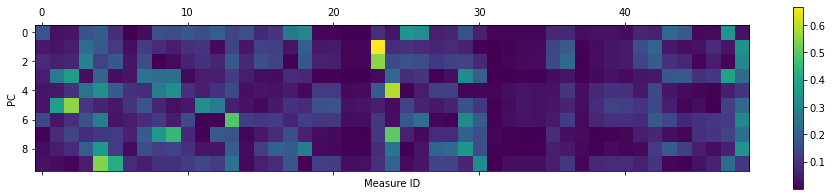

In [58]:
plt.matshow(pca.components_, cmap='RdBu_r')
plt.colorbar()
plt.xlabel('Measure ID')
plt.ylabel('PC')
plt.show()

plt.matshow(np.abs(pca.components_), cmap='viridis')
plt.colorbar()
plt.xlabel('Measure ID')
plt.ylabel('PC')
plt.show()

## Most important measures for the first 7 components

In [63]:
cumulative_contribution = np.sum(np.abs(pca.components_[0:7,:]), axis=0)
important_measures_id = np.argsort(cumulative_contribution)[::-1]
for measure_id in important_measures_id:
    print(measures_names[measure_id]+' id '+str(measure_id)+': ' +str(cumulative_contribution[measure_id]))

eccentricity_skew id 23: 1.6830347579258278
similarity_analysis_kurt id 48: 1.5497370413400855
frac_periphery id 4: 1.4196899822500435
basic_stats_med id 13: 1.2783287250775532
connected_components_ent id 2: 1.2689116535131948
frac_center id 3: 1.2657313247276911
degree_analysis_skew id 29: 1.178537172566909
eccentricity_kurt id 24: 1.1447958007127665
similarity_analysis_skew id 47: 1.0811833820338963
degree_analysis_avg id 26: 1.0302330210851163
degree_analysis_med id 25: 1.0260265708599965
basic_stats_kurt id 18: 0.9846369204426487
communicability_kurt id 42: 0.9845420263095409
transitivity id 8: 0.9435032141434263
erank_ratio id 7: 0.8928437075974492
avg_clustering id 9: 0.8855583950931678
frac_largest_connected_component id 1: 0.8653229668653691
flow_graph_kurt id 36: 0.8053948510141612
modularity id 11: 0.8017339462692126
similarity_analysis_med id 43: 0.7865514727499301
markov_rate id 12: 0.7185688790520159
frac_barycenter id 5: 0.6871352983164156
degree_analysis_kurt id 30: 0.65

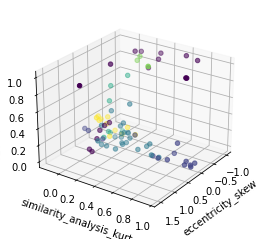

eccentricity_skew similarity_analysis_kurt frac_periphery


In [64]:
x = measures[:,important_measures_id[0]]
y = measures[:,important_measures_id[1]]
z = measures[:,important_measures_id[2]]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, c=kmeans_labels,s=20)
plt.xlabel(str(measures_names[important_measures_id[0]]))
plt.ylabel(str(measures_names[important_measures_id[1]]))
ax.set_zlabel(str(measures_names[important_measures_id[2]]))
ax.view_init(25, 35)
plt.show()
print(str(measures_names[important_measures_id[0]]),str(measures_names[important_measures_id[1]]),
      str(measures_names[important_measures_id[2]]))

In [72]:
# Top 5 of important measures per principal component
for i in range(10):
    print('PC ' +str(i)+'\n')
    contribution = np.abs(pca.components_[i,:])
    important_measures_id = np.argsort(contribution)[::-1]
    for measure_id in important_measures_id[0:5]:
        print(measures_names[measure_id] + ' id ' + str(measure_id) + ': ' + str(contribution[measure_id]))
    print('\n')

PC 0

degree_analysis_med id 25: 0.3487126723126664
similarity_analysis_skew id 47: 0.3486478747819485
degree_analysis_avg id 26: 0.3263257618056396
basic_stats_kurt id 18: 0.3096260780498868
basic_stats_skew id 17: 0.2699642036571359


PC 1

eccentricity_skew id 23: 0.6677667864208348
similarity_analysis_kurt id 48: 0.34200842725645353
frac_center id 3: 0.23985589371400884
communicability_kurt id 42: 0.21730108052021993
basic_stats_kurt id 18: 0.2011535654149716


PC 2

eccentricity_skew id 23: 0.5528459932407547
similarity_analysis_kurt id 48: 0.3095737784563546
frac_center id 3: 0.29076830965882017
flow_graph_kurt id 36: 0.22305253297191194
communicability_kurt id 42: 0.19299651398105885


PC 3

similarity_analysis_skew id 47: 0.388439534897732
connected_components_ent id 2: 0.36684296922526305
degree_analysis_skew id 29: 0.3215039784877461
frac_largest_connected_component id 1: 0.2770748960563688
erank_ratio id 7: 0.25378657046924813


PC 4

eccentricity_kurt id 24: 0.5909043068856

## Other example: in vitro neural networks

In [84]:
A19 = 1.0*np.load('adj_d19.npy')
A8 = 1.0*np.load('adj_d8.npy')

In [104]:
FP19=fingerprint(A19)
FP8=fingerprint(A8)

array([ 6.40523286e-03,  8.63013699e-01,  2.33980696e-01,  7.93650794e-03,
        5.29100529e-03,  2.64550265e-03,  1.48152860e-01,  7.21312777e-01,
        2.59350092e-01,  2.09926071e-01,  5.24079556e-02,  8.57840854e-01,
       -6.80550169e-16,  0.00000000e+00,  6.39060904e-03,  7.96854388e-02,
        1.26996045e-02,  9.87229074e-01,  9.68276390e-01,  6.63129973e-02,
        6.79901197e-02,  9.64894109e-03,  1.10742603e-02,  3.67581495e-02,
        5.06404278e-02,  1.36986301e-02,  1.27812181e-02,  7.09114729e-03,
        7.99553146e-03, -7.41421139e-03,  7.81245908e-02,  2.49977459e-23,
        2.16119107e-03,  2.43973082e-02,  4.28566504e-03,  9.83117923e-01,
        9.58412326e-01,  2.01665416e-16,  7.01968071e-03,  6.96886412e-02,
        1.38800728e-02,  9.77508754e-01,  9.44888566e-01,  0.00000000e+00,
        6.71352661e-03,  5.10897733e-02,  1.32189177e-02,  9.69060751e-01,
        9.24005047e-01])

<Figure size 360x360 with 0 Axes>

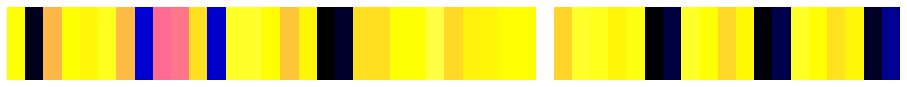

<Figure size 360x360 with 0 Axes>

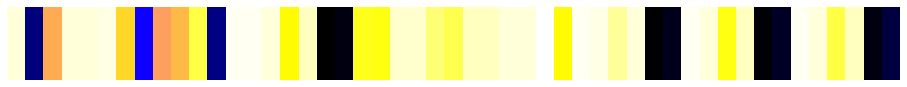

In [160]:
plt.figure(figsize=(5,5))
vec19=(dict_to_vec(FP19)[0:49]).reshape(1,49)
plt.matshow(vec19, cmap='gnuplot2_r', aspect=4)#,vmin=-2,vmax=2)
#plt.colorbar(fraction=0.005)
plt.axis('off')
plt.savefig('fp19.png', dpi=300 )
plt.show()

plt.figure(figsize=(5,5))
vec8=(np.real(dict_to_vec(FP8))[0:49]).reshape(1,49)
plt.matshow(vec8, cmap='gnuplot2_r', aspect=4)#vmin=-2,vmax=2)
plt.axis('off')
plt.savefig('fp8.png', dpi=300 )
plt.show()

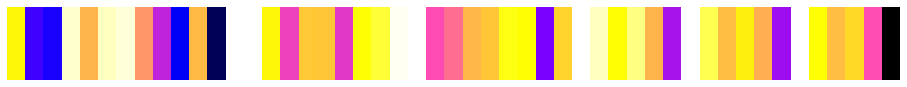

In [159]:
#plt.figure(figsize=(5,5))
plt.matshow(np.abs(dict_to_vec(FP19)-np.real(dict_to_vec(FP8))).reshape(1,49), cmap='gnuplot2_r', aspect=4)
plt.axis('off')
plt.savefig('fp_diff.png', dpi=300 )
plt.show()